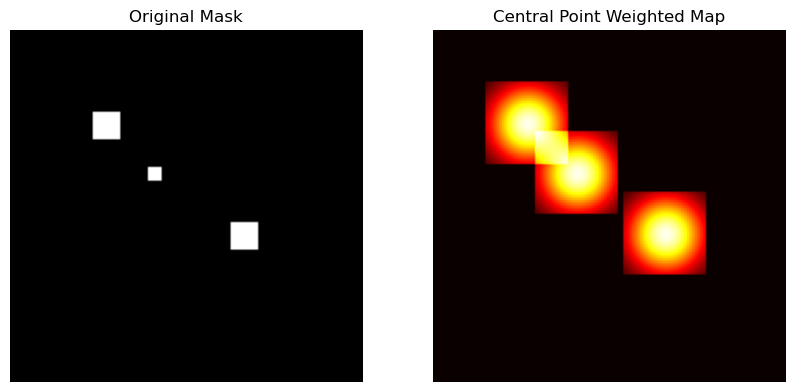

In [32]:
import torch
import matplotlib.pyplot as plt
from scipy.ndimage import center_of_mass, label

# Sample binary mask with three spots (trees)
mask = torch.zeros((1, 1, 128, 128), dtype=torch.float32)
mask[0, 0, 30:40, 30:40] = 1  # First spot
mask[0, 0, 70:80, 80:90] = 1  # Second spot
mask[0, 0, 50:55, 50:55] = 1  # Third spot

def get_center_weight_map(mask, kernel_size=31, sigma=10):
    center_map = torch.zeros_like(mask, dtype=torch.float32)
    for batch_idx in range(mask.size(0)):
        mask_np = mask[batch_idx, 0].cpu().numpy()
        
        # Label each connected component in the mask
        labeled_mask, num_features = label(mask_np)
        
        # Find the center of each labeled spot
        centers = center_of_mass(mask_np, labels=labeled_mask, index=range(1, num_features + 1))
        
        for cy, cx in centers:
            if not (torch.isnan(torch.tensor(cy)) or torch.isnan(torch.tensor(cx))):
                cy, cx = int(cy), int(cx)
                for y in range(max(0, cy - kernel_size // 2), min(mask.size(2), cy + kernel_size // 2)):
                    for x in range(max(0, cx - kernel_size // 2), min(mask.size(3), cx + kernel_size // 2)):
                        dist = torch.tensor(((y - cy) ** 2 + (x - cx) ** 2) / (2 * sigma ** 2), device=mask.device)
                        center_map[batch_idx, 0, y, x] += torch.exp(-dist)
    return center_map

# Generate weight map based on the central points
center_weight_map = get_center_weight_map(mask)

# Plot the original mask and the weight map
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(mask[0, 0].cpu(), cmap="gray")
axs[0].set_title("Original Mask")
axs[0].axis("off")

axs[1].imshow(center_weight_map[0, 0].cpu(), cmap="hot")
axs[1].set_title("Central Point Weighted Map")
axs[1].axis("off")

plt.show()


In [30]:
import numpy as np
np.unique(center_weight_map)

array([0.        , 0.10539922, 0.12184567, 0.13945685, 0.14085841,
       0.15802531, 0.16121763, 0.1772844 , 0.18268351, 0.18451951,
       0.19691168, 0.20494778, 0.209088  , 0.21653567, 0.22763768,
       0.23457028, 0.23574607, 0.23692775, 0.2503238 , 0.25410697,
       0.2605397 , 0.26580295, 0.27117255, 0.2725318 , 0.2865048 ,
       0.2937577 , 0.29523015, 0.29819727, 0.29969198, 0.31036696,
       0.31192267, 0.3134862 , 0.31822392, 0.32303324, 0.32465246,
       0.33121088, 0.33621648, 0.34645584, 0.3534547 , 0.35879648,
       0.36421898, 0.36787945, 0.37343922, 0.3753111 , 0.37908304,
       0.3809832 , 0.3965314 , 0.4045419 , 0.40656966, 0.41065577,
       0.42105156, 0.42741492, 0.42955735, 0.44043165, 0.44485807,
       0.44932896, 0.4561197 , 0.46533394, 0.4747343 , 0.4771139 ,
       0.48190898, 0.48432454, 0.48675224, 0.50409025, 0.506617  ,
       0.5220458 , 0.52729243, 0.53526145, 0.5433509 , 0.5460744 ,
       0.5571059 , 0.5598984 , 0.56836015, 0.5798418 , 0.58860

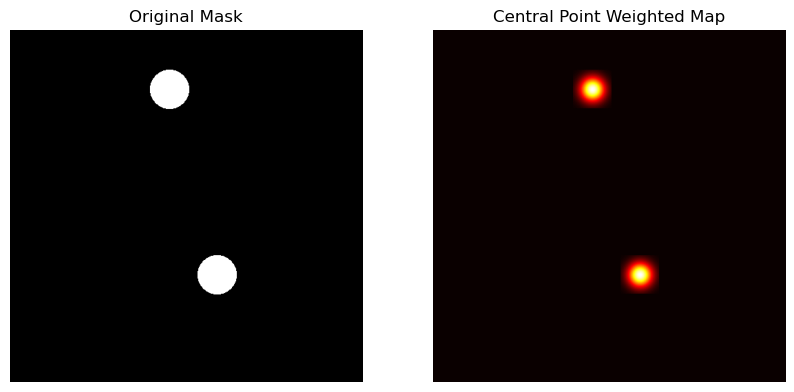

In [43]:
img_path = '../../../../data/2024-10-30-loc-dataset-512/aug_train/masks/tile_shp_44_9.png'
img = Image.open(img_path).convert('L')  # Convert to grayscale
mask = torch.tensor(np.array(img) > 0, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # Create a binary mask

center_weight_map = get_center_weight_map(mask, 56, 12)

# Plot the original mask and the weight map
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(mask[0, 0].cpu(), cmap="gray")
axs[0].set_title("Original Mask")
axs[0].axis("off")

axs[1].imshow(center_weight_map[0, 0].cpu(), cmap="hot")
axs[1].set_title("Central Point Weighted Map")
axs[1].axis("off")

plt.show()